<a href="https://colab.research.google.com/github/janvi27-cloud/face-emotion-detector/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1 importing
import tensorflow as tf
from tensorflow.keras import datasets, layers, models # here all the datasets are importes we do not need to download the dataset
import matplotlib.pyplot as plt # For plotting images and accuracy graphs
import numpy as np

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


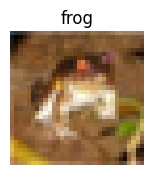

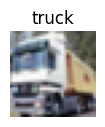

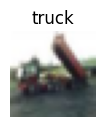

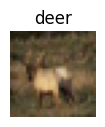

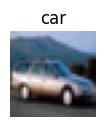

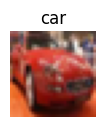

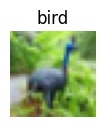

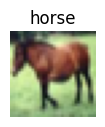

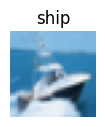

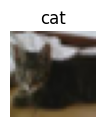

In [ ]:
# Step 2: Load and Preprocess the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data() # Load training & testing data
# Normalize pixel values (0–255 → 0–1) for faster and stable training
x_train, x_test = x_train / 255.0, x_test / 255.0
# Define class names corresponding to labels (0–9)
class_names = ['airplane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
# Display 10 sample images with labels
plt.figure(figsize=(10,4)) # Set figure size
for i in range(10): # Loop through first 10 images
 plt.subplot(2,5,i+1) # Create 2 rows × 5 columns grid
 plt.imshow(x_train[i]) # Show image
 plt.title(class_names[y_train[i][0]]) # Display class name as title
 plt.axis('off') # Hide axes for cleaner view
 plt.show() # Render the figure


In [ ]:
# Step 3: Build the CNN Model
model = models.Sequential([ # Sequential = stack of layers
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)), # 1st Conv layer with 32 filters
 layers.MaxPooling2D((2,2)), # Downsample feature maps (reduce size)
 layers.Conv2D(64, (3,3), activation='relu'), # 2nd Conv layer
 layers.MaxPooling2D((2,2)), # 2nd pooling layer
 layers.Conv2D(64, (3,3), activation='relu'), # 3rd Conv layer for deeper features
 layers.Flatten(), # Flatten 3D features → 1D vector
 layers.Dense(64, activation='relu'), # Fully connected layer with 64 neurons
 layers.Dense(10) # Output layer (10 neurons = 10 classes)
])
# Print model summary to see layer structure
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Compile and Train the Model
model.compile(optimizer='adam', # Optimizer: Adam (adaptive learning)
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Suitable for integer labels
 metrics=['accuracy']) # Track accuracy while training
# Train the model for 10 epochs
history = model.fit(x_train, y_train, epochs=20,
 validation_data=(x_test, y_test)) # Validate on test data each epoch

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7967 - loss: 0.5777 - val_accuracy: 0.7064 - val_loss: 0.8906
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8078 - loss: 0.5445 - val_accuracy: 0.7101 - val_loss: 0.8812
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8185 - loss: 0.5163 - val_accuracy: 0.6937 - val_loss: 0.9672
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8293 - loss: 0.4817 - val_accuracy: 0.7096 - val_loss: 0.9209
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8410 - loss: 0.4530 - val_accuracy: 0.7050 - val_loss: 0.9546
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8457 - loss: 0.4302 - val_accuracy: 0.7082 - val_loss: 0.9968
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8577 - loss: 0.3995 - val_accuracy: 0.7125 - val_loss: 0.9844
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8654 - loss: 0.3822 -

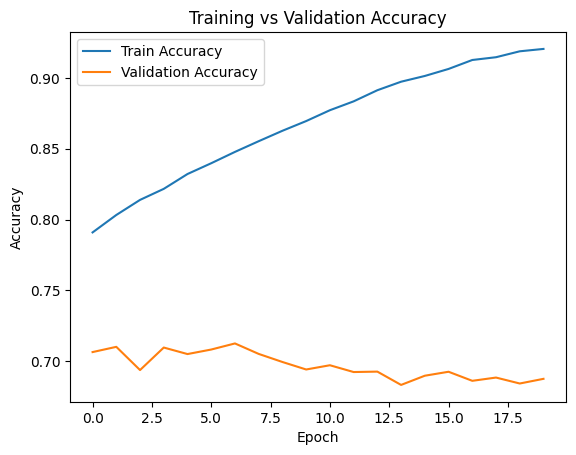

In [ ]:
# Step 5: Plot Accuracy Curves
plt.plot(history.history['accuracy'], label='Train Accuracy') # Training accuracy per epoch
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Validation accuracy per epoch
plt.xlabel('Epoch') # X-axis label
plt.ylabel('Accuracy') # Y-axis label
plt.legend() # Add legend
plt.title("Training vs Validation Accuracy") # Add chart title
plt.show() # Display plot

In [ ]:
# Step 6: Evaluate Model Performance
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2) # Evaluate on test data
print(f"Test Accuracy: {test_acc*100:.2f}%") # Print final accuracy

313/313 - 1s - 2ms/step - accuracy: 0.6875 - loss: 1.6398
Test Accuracy: 68.75%


In [ ]:
# Step 7: Make Predictions on Test Images
# Add Softmax layer to convert model outputs (logits) into probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
# Predict class probabilities for first 5 test images
predictions = probability_model.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


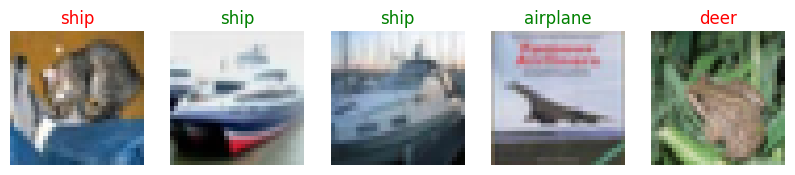

In [ ]:
# Step 8: Visualize Predictions
plt.figure(figsize=(10,4))
for i in range(5): # Show first 5 test images
 plt.subplot(1,5,i+1)
 plt.imshow(x_test[i])
 predicted_label = class_names[np.argmax(predictions[i])] # Get class with highest probability
 true_label = class_names[y_test[i][0]] # Actual label
 color = 'green' if predicted_label == true_label else 'red' # Green if correct, red if wrong
 plt.title(predicted_label, color=color) # Show prediction with color code
 plt.axis('off') # Hide axes
plt.show() # Display figure

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

Saving cat.png to cat.png
Uploaded file: cat.png


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


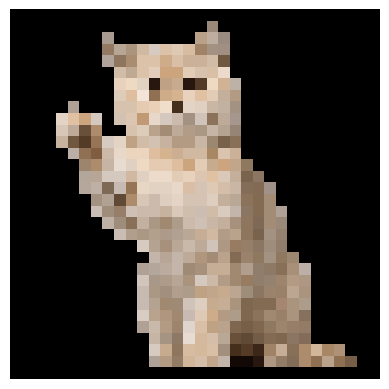

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
Predicted label: bird


In [ ]:
# Step 1: Upload image
uploaded = files.upload()

# Step 2: Preprocess image
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

img = image.load_img(file_name, target_size=(32, 32))
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Define class labels (CIFAR-10)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Step 3: Predict using trained model
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(img_array)

predicted_class = np.argmax(predictions[0])
predicted_label = class_names[predicted_class]

print(f"Predicted label: {predicted_label}")